In [3]:
from osgeo import gdal
nmtif = gdal.Open(r'Data/nm_relief_color_tif/nm_relief_color.tif')
print(nmtif.GetMetadata())

{'AREA_OR_POINT': 'Area', 'TIFFTAG_DATETIME': '2002:12:18  8:10:06', 'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)', 'TIFFTAG_SOFTWARE': 'IMAGINE TIFF Support\nCopyright 1991 - 1999 by ERDAS, Inc. All Rights Reserved\n@(#)$RCSfile: etif.c $ $Revision: 1.9.3.3 $ $Date: 2002/07/29 15:51:11EDT $', 'TIFFTAG_XRESOLUTION': '96', 'TIFFTAG_YRESOLUTION': '96'}


In [4]:
nmtif.GetProjection()

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

In [7]:
from osgeo import osr
p = osr.SpatialReference()
p.ImportFromEPSG(26913)
nmtif.SetProjection(p.ExportToWkt())

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

In [8]:
geoTiffDriver = "GTiff"
driver=gdal.GetDriverByName(geoTiffDriver)
out = driver.CreateCopy('copy.tif', nmtif, strict = 0)

In [10]:
out.GetProjection()

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

In [11]:
nmtif.RasterCount

3

In [12]:
band = nmtif.GetRasterBand(1)

In [18]:
values = band.ReadAsArray()

In [19]:
values[1100,1100]

216

In [20]:
one = nmtif.GetRasterBand(1).ReadAsArray()
two = nmtif.GetRasterBand(2).ReadAsArray()
three = nmtif.GetRasterBand(3).ReadAsArray()
print(str(one[1100,1100]) + "," + str(two[1100,1100]) + "," + str(three[1100,1100]))

216,189,157


In [22]:
one = nmtif.GetRasterBand(1)
one.ComputeBandStats()

(225.05771967375847, 34.08382839593031)

In [26]:
print("최대값 = ", str(one.GetMaximum()))
print("최소값 = ", str(one.GetMinimum()))


최대값 =  255.0
최소값 =  0.0


In [27]:
print("변경 전 = ", str(one.GetDescription()))
one.SetDescription("The Red Band")
print("변경 후 = ", str(one.GetDescription()))

변경 전 =  Band_1
변경 후 =  The Red Band


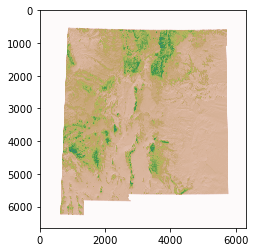

In [30]:
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline
data_array=nmtif.ReadAsArray()
x=np.array(data_array[0])
image = x.reshape(x.shape[0], x.shape[1])
imshow(image, cmap='gist_earth')

In [33]:
raster = np.array([[10,10,1,10,10,10,10],
                  [1,1,1,50,10,10,50],
                 [10,1,1,51,10,10,50],
                 [1,1,1,1,50,10,50]])
raster

array([[10, 10,  1, 10, 10, 10, 10],
       [ 1,  1,  1, 50, 10, 10, 50],
       [10,  1,  1, 51, 10, 10, 50],
       [ 1,  1,  1,  1, 50, 10, 50]])

In [37]:
coord=(-106,629773, 35.105389)
w, h = 10, 10
name = "new.tif"

In [42]:
d=gdal.GetDriverByName("GTiff")
rows = raster.shape[0]
cols = raster.shape[1]
output = d.Create(name, cols, rows, 1, gdal.GDT_UInt16)
output.SetGeoTransform((coord[0], w, 0, coord[1], 0 ,h))
output.GetRasterBand(1).WriteArray(raster)
outsr = osr.SpatialReference()
outsr.ImportFromEPSG(4326)
output.SetProjection(outsr.ExportToWkt())
output.FlushCache()

In [39]:
raster.shape[0]

4

array([[10, 10,  1, 10, 10, 10, 10],
       [ 1,  1,  1, 50, 10, 10, 50],
       [10,  1,  1, 51, 10, 10, 50],
       [ 1,  1,  1,  1, 50, 10, 50]], dtype=uint16)

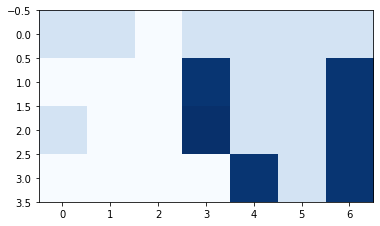

In [43]:
data = output.ReadAsArray()
w,h = 4,7
image = data.reshape(w,h)
imshow(image, cmap='Blues')
data